# DRILL - Exploring the Central Limit Theorem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [2]:
def get_it(pop1,pop2):
    for prop in properties:
        print(prop.__name__.ljust(5),"pop1 => %.3f"%prop(pop1),"pop2 => %.3f"%prop(pop2))


In [3]:
def show_distrib(dist,title):
    plt.hist(dist)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Population")
    plt.show()
    

In [4]:
pop_size = {}
properties=[np.mean,np.std]
samples = [100,1000,20]

mean  pop1 => 1.950 pop2 => 5.550
std   pop1 => 1.071 pop2 => 1.857
===> pop1
======> 100


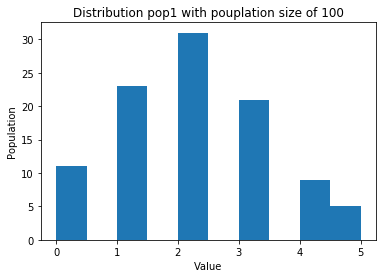

======> 1000


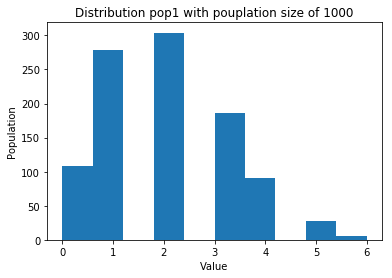

======> 20


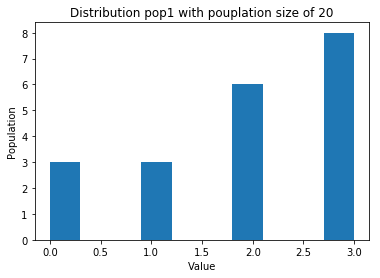

===> pop2
======> 100


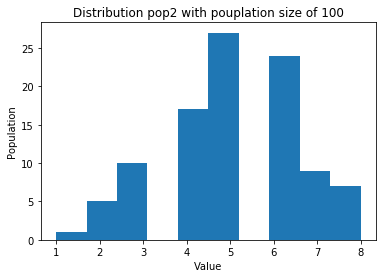

======> 1000


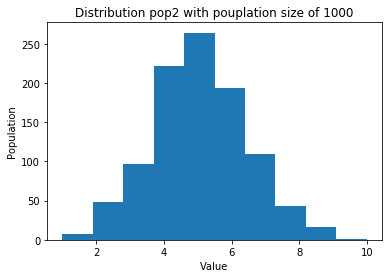

======> 20


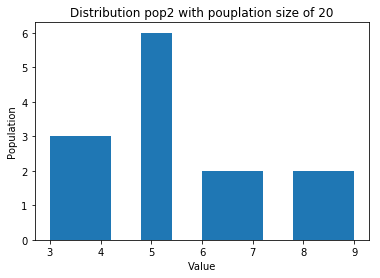

In [5]:
for sample_size in samples:
    pop_size[sample_size] = {}
    pop_size[sample_size]["pop1"] = np.random.binomial(10, 0.2, sample_size)
    pop_size[sample_size]["pop2"] = np.random.binomial(10,0.5, sample_size) 
get_it(pop_size[sample_size]["pop1"],pop_size[sample_size]["pop2"])

for dist_name in pop_size[samples[0]].keys():
    print("===>",dist_name)
    for sample in samples:
        print("======>",sample)
        show_distrib(pop_size[sample][dist_name],"Distribution %s with population size of %i" %(dist_name,sample))
        

mean  pop1 => 1.950 pop2 => 3.250
std   pop1 => 1.071 pop2 => 1.043
===> pop1
======> 100


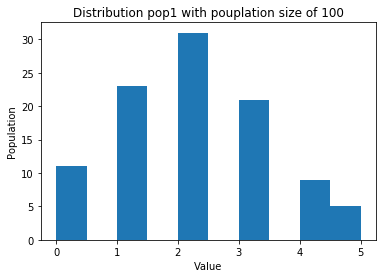

======> 1000


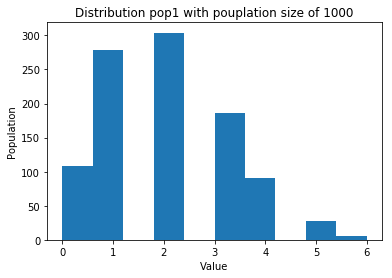

======> 20


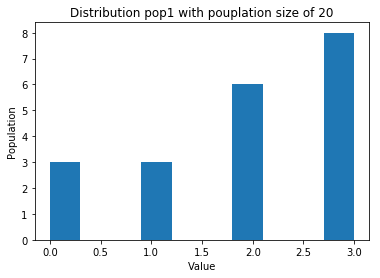

===> pop2
======> 100


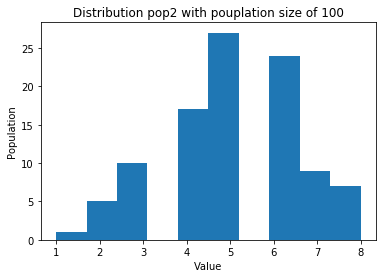

======> 1000


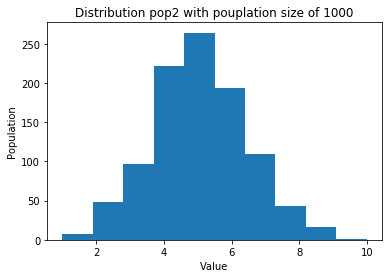

======> 20


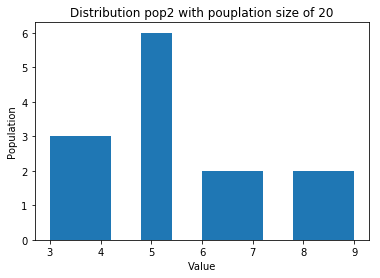

===> pop3
======> 100


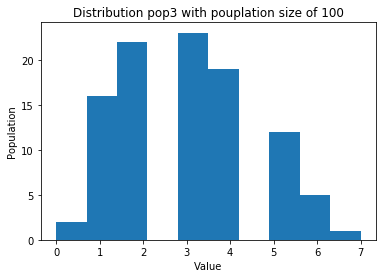

======> 1000


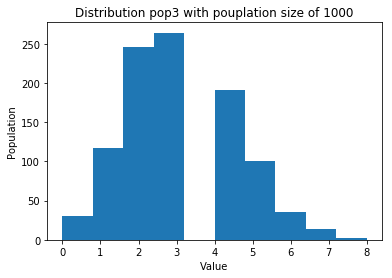

======> 20


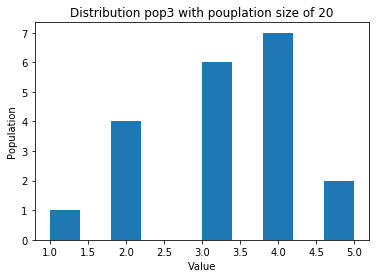

In [7]:
for sample_size in samples:
    pop_size[sample_size]["pop3"] = np.random.binomial(10, 0.3, sample_size)

get_it(pop_size[sample_size]["pop1"],pop_size[sample_size]["pop3"])

for dist_name in pop_size[samples[0]].keys():
    print("===>",dist_name)
    for sample in samples:
        print("======>",sample)
        show_distrib(pop_size[sample][dist_name],"Distribution %s with pouplation size of %i" %(dist_name,sample))
        

In [14]:
print(ttest_ind(pop_size[1000]["pop1"], pop_size[1000]["pop2"], equal_var=False))

Ttest_indResult(statistic=-47.83218674604066, pvalue=0.0)


In [15]:
print(ttest_ind(pop_size[1000]["pop3"], pop_size[1000]["pop2"], equal_var=False))

Ttest_indResult(statistic=-29.86984344927221, pvalue=2.677247928138223e-162)


In [18]:
pop_size[1000]["pop4"] = np.random.binomial(10,0.4, sample_size) 
print(ttest_ind(pop_size[1000]["pop4"], pop_size[1000]["pop2"], equal_var=False))

Ttest_indResult(statistic=-5.305795118044228, pvalue=3.399883505774911e-05)
